# Test: Chi2 et Wilcoxon

In [1]:
import os
if not os.path.exists("assets_alea"):
    !git clone https://github.com/vincentvigon/assets_alea

Cloning into 'assets_alea'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68 (from 1)
Receiving objects: 100% (68/68), 4.99 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
%reset -f

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
np.set_printoptions(linewidth=400,precision=2,suppress=True)

## Tests de Pearson du Chi2

Les tests du $\chi_2$ sont tous basés sur la même théorie. Commençons par un exemple, puis expliquons le principe général.




### Test d'adéquation $\triangleright$

C'est sans doute le test statistique le plus connu. Il est très simple à interpréter.  Il permet de savoir si un échantillon suit une loi donnée. Il ne s'applique qu'aux lois discrètes contrairement au test de Kolmogorov ou de Mann-Whitney.

Exemple: On dispose de deux dés, un rouge et un noir. On voudrait savoir si l'un des deux est truqué. On les fait rouler 60 fois chacun.

In [5]:
"""nombre de 1,2,3,4,5,6 obtenu : """
black = np.array([9, 10, 12, 11, 8, 10])
red =  np.array([6, 5, 14, 15, 11, 9])
N=60


A l'oeil :  pensez-vous qu'un des deux dés est truqué?




#### ♡



Tester qu'un dé est truqué ou non revient à choisir entre ces deux hypothèses:

* H0: <font color="red"> La proba de chaque chiffre est 1/6 </font>
* H1: <font color="red"> Ou pas </font>



Pour choisir entre $H_0$ et $H_1$, nous effectuons le  test du $\chi_2$ de Pearson.
La fonction `scipy.stats.chisquare()` calcule une statistique positive, qui est une sorte de distance entre les effectifs attendus (=expected) et les effectifs observés.
Puis elle calcule une p-value.

Sans rien savoir de plus, vous pouvez conclure avec le programme suivant si l'un des deux dés est truqué ($1\heartsuit$) ou non.

In [6]:
D, p = stats.chisquare(f_obs=black,f_exp=[10, 10, 10, 10, 10, 10])

"""Remarque :  le second argument f_exp est facultatif, par défaut scipy.stats.chisquare teste une distribution uniforme"""
print("black dice")
print("stats:",D,"p-value:",p)
D, p = stats.chisquare(f_obs=red,f_exp=[10, 10, 10, 10, 10, 10])
print("red dice")
print("stats:",D,"p-value:",p)

black dice
stats: 1.0 p-value: 0.9625657732472964
red dice
stats: 8.399999999999999 p-value: 0.13552522337752962


Et bien en fait non, aucun des deux dés ne serait truqué : les deux `p_value` sont supérieures à 0.05. Celle du dé noir est quand même bien supérieure à celle du dé rouge, donc le résultat est plus fiable pour le dé noir.

### La statistique


La statistique de Pearson (= distance du $\chi_2$). Elle est donnée par:
$$          
D =   \sum_{i} \frac{\big(f_{obs}(i)-f_{exp}(i)\big)^2}{f_{exp}(i)}                 
$$
avec

* $f_{obs}(i)$: effectif observé dans la classe $i$
* $f_{exp}(i)$: effectif attendu dans la classe $i$

Sous $H_0$, elle suit une loi du $\chi_2$ à $J\!-\!1$  degrés de liberté ($J=6=$ nombre de classe possible).
Calculez ($2\heartsuit$) la p-value en utilisant la fonction de répartition du $\chi_2$ fournie par scipy `stats.chi2.cdf(x,df=J-1)`



In [12]:

f_exp=np.array([10,10,10,10,10,10])

def one_dice(f_obs):
    D=np.sum( (f_obs-f_exp)**2 / f_exp)
    p = 1 - stats.chi2(df=5).cdf(D)
    return D,p

D,p = one_dice(black)
print(f"Pour le dé black: stat:{D:.3g}, p-value:{p:.3g}")

D,p = one_dice(red)
print(f"Pour le dé red: stat:{D:.3g}, p-value:{p:.3g}")

Pour le dé black: stat:1, p-value:0.963
Pour le dé red: stat:8.4, p-value:0.136


ATTENTION :  dans la terminologie de scipy (découverte dans l'aide) :

* f_obs     =  frequency observed
* f_exp     =  frequency expected

Mais on comprend vite que "frequency" doit être un "nombre d'occurences"; alors qu'en français, les "fréquences"  seraient plutôt des fractions black/N et red/N.

Du coup, dans la suite, nous traduirons :

* f_obs     =  effectif observé
* f_exp     =  effectif attendu


In [ ]:
#recalculons
f_exp=[10]*6


D = 0
for i in range(6):
    D += (black[i] - f_exp[i])**2 / f_exp[i]
p = 1 - stats.chi2.cdf(D, df=5)
print(f"black : p_value={p:.5f} , D={D:.5f}")

D = 0
for i in range(6):
    D += (red[i] - f_exp[i])**2 / f_exp[i]
p = 1 - stats.chi2.cdf(D, df=5)
print(f"red   : p_value={p:.5f} , D={D:.5f}")

### Puissance du test


#### ♡♡♡


***À vous:*** Placez-vous sous $H_1$: prenez un dès truqué. Montrez que lorsqu'on fait rendre le nombre de lancé $N$ vers l'infini, la statistique $D$ tend vers l'infini.

### Principe général du Chi2 $\triangleright$

Un test du $\chi_2$ teste  l'adéquation entre des effectifs $f_{obs}$ observés dans un échantillon et des effectifs attendus $f_{exp}$ (attendu=expected). La distance ou statistique du $\chi_2$ est la différence au carré entre $f_{obs}$ et $f_{exp}$ renormalisée comme ceci:
$$          
D =   \sum_{i} \frac{\big(f_{obs}(i)-f_{exp}(i)\big)^2}{f_{exp}(i)}                 
$$

* Sous $H_0$, $D$ suit une loi du $\chi_2$ à $J\!-\!1$ degré de liberté, où $J$ est le nombre de classe de valeurs possibles pour notre échantillon.  

* Sous $H_1$, la distance $D$ est très grande (elle tend vers $+\infty$ quand la taille de l'échantillon grandit).

MAIS: Si la loi de probabilité attendue dépend de paramètres (moyenne, variance, etc.) inconnus au moment du test, les données peuvent être utilisées pour estimer ceux-ci, ce qui facilite l'adéquation mais change la loi de $D$: s'il y a $s$ paramètres inconnus,  $D$ suivra une loi du $\chi_2$ à  $J–s–1$ degrés de liberté.
    


### Application

On considère l'échantillon suivant (exemple de wikipedia), que l'on suppose correspondre à $n=100$ réalisations identiques et indépendantes $X_1, …, X_n$ d'une certaine loi :
$$
\begin{array}{|l|c|c|c|c|c|}
\hline
\text{valeur} & 0&1&2&3&4 \\
\hline
\text{effectifs} & 31&45&16&7&1 \\
\hline
\end{array}
$$
    
Testons si cette loi est la loi de Poisson. Le paramètre $\lambda$ de la loi de Poisson est à la fois son espérance et sa variance. On peut donc l'estimer de deux manières possibles :
$$
\hat\lambda_1 = \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
$$
$$
\hat\lambda_2 = s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

In [13]:
n = 100
val = np.array([0,1,2,3,4])
eff = np.array([31, 45, 16, 7, 1])

hat_lambda_1 = 1/n * np.sum(eff * val)
print("hat_lambda_1 = {:.2f}".format(hat_lambda_1))

hat_lambda_1 = 1.02


Pour calculer la statistique $D$, on souhaite avoir au moins cinq individus dans chaque classe. Pour ce faire, on regroupe les deux dernières colonnes :
$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{classe} & \{0\}&\{1\}&\{2\}& [3;+\infty[ \\
\hline
f_{obs} & 31&45&16&8 \\
\hline
\end{array}
$$
Il suffit alors de calculer les effectifs attendus pour chacune de ces classes (et pour chaque estimateur de $\lambda$) et d'effectuer le test d'adéquation, en indiquant à `scipy` qu'il faut retirer un degré de liberté (via `ddof=1`) car un paramètre a été estimé.


In [14]:
classes = [0,1,2,3]
f_obs = [31, 45, 16, 8]

# f_exp = [ P(X=0)*n, P(X=1)*n, P(X=2)*n, P(X>2.5)*n ]

# Avec le premier estimateur
f_exp_1 = [stats.poisson.pmf(0,mu=hat_lambda_1)*n,
           stats.poisson.pmf(1,mu=hat_lambda_1)*n,
           stats.poisson.pmf(2,mu=hat_lambda_1)*n,
           (1 - stats.poisson.cdf(2.5, mu=hat_lambda_1))*n]
print("f_exp_1 | {:.2f} | {:.2f} | {:.2f} | {:.2f} |".format(*f_exp_1))


f_exp_1 | 36.06 | 36.78 | 18.76 | 8.40 |


In [15]:
D, p_value_1 = stats.chisquare(f_obs,f_exp_1,ddof=1)
print("p_value_1 =", p_value_1)


p_value_1 = 0.22634310462098886


### Autre estimateur:

In [16]:
hat_lambda_2 = 1/(n-1) * np.sum(eff * (val - hat_lambda_1)**2)
print("hat_lambda_2 = {:.2f}".format(hat_lambda_2))

hat_lambda_2 = 0.85


In [17]:

# Avec le deuxième estimateur
f_exp_2 = [stats.poisson.pmf(0,mu=hat_lambda_2)*n,
           stats.poisson.pmf(1,mu=hat_lambda_2)*n,
           stats.poisson.pmf(2,mu=hat_lambda_2)*n,
           (1 - stats.poisson.cdf(2.5, mu=hat_lambda_2))*n]
print("f_exp_2 | {:.2f} | {:.2f} | {:.2f} | {:.2f} |".format(*f_exp_2))


D, p_value_2 = stats.chisquare(f_obs,f_exp_2,ddof=1)
print("p_value_2 =", p_value_2)

f_exp_2 | 42.82 | 36.32 | 15.40 | 5.46 |
p_value_2 = 0.03787392865349948



Avec le premier estimateur, la `p_value` est supérieure à $0.05$, donc on ne rejette pas l'hypothèse que la loi suivie soit de Poisson, avec le second c'est l'inverse. On est encore dans un cas limite. Il faut dire que l'on travaille avec très peu de données.

### Test d'indépendance

C'est un cas particulier du cadre général, on le montrera plus loin. Une fois n'est pas coutume, commençons par un exemple.


Les données ont la forme d'une "dataframe", c'est-à-dire d'une matrice où chaque colonne représente une caractéristique et chaque ligne représente une observation. Ici chaque ligne représente un homme,  qui a deux caractéristiques:

*  son pays d'origine qui peut être $[0,1,2,3,4]$, ce qui représente les pays \["France", "Allemagne", "Espagne", "Italie", "Angleterre"\].
*  sa boisson préférée qui peut être $[0,1,2]$, ce qui représente les boissons \["coca", "vin", "bière"\]


Dans la fonction `dataCreation_1()` nous simulons les données. Dans un premier temps, ne  regardez pas en détail cette fonction, pour garder le suspense du test.

In [18]:
def dataCreation_1():
    np.random.seed(10)

    """ on génère les pays: [0,1,2,3,4] <-> ["France","Allemagne","Espagne","Italie","Angleterre"]  """
    country = np.random.choice( a=[0,1,2,3,4] ,
                                p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                                size=1000)
    """on génère les boissons: [0,1,2] <-> ["coca","vin","biere"]"""
    favorite_beverage = np.random.choice(a= [0,1,2],
                                  p = [0.4, 0.2, 0.4],
                                  size=1000)

    """on colle pour faire une dataFrame"""
    dataFrame=np.stack([country,favorite_beverage],axis=1)

    return dataFrame

In [19]:
""" observons les données"""
dataFrame=dataCreation_1()
print(dataFrame[:10,:])

[[4 0]
 [0 2]
 [4 1]
 [4 2]
 [3 0]
 [2 0]
 [1 2]
 [4 0]
 [1 1]
 [1 0]]


In [20]:
#Une fonction utilitaire qui calcule la matrice des effectifs (=frequencies) :
def computeFrequencies(X,Y,nbClassesX,nbClassesY):
    assert len(X)==len(Y), "les deux vecteurs d'entrées doivent avoir la même longueur"

    f_obs = np.zeros([nbClassesX, nbClassesY])
    n = len(X)
    """on fait une conversion, au cas où l'utilisateur de cette fonction aurait saisi des float"""
    X=X.astype(np.int32)
    Y=Y.astype(np.int32)
    for i in range(n):
        f_obs[X[i], Y[i]] += 1

    return f_obs

In [21]:
observed=computeFrequencies(dataFrame[:,0],dataFrame[:,1],5,3)
observed

array([[ 21.,   7.,  32.],
       [ 65.,  25.,  64.],
       [107.,  50.,  94.],
       [ 15.,   8.,  15.],
       [189.,  96., 212.]])

Comparons avec les effectifs que l'on attend si on est en situation d'indépendance (sous $H_0$):

In [22]:
n=len(dataFrame)
total_country=np.sum(observed,axis=1)/n
total_fav_bev=np.sum(observed,axis=0)/n
expected_proba=np.outer(total_country,total_fav_bev)
expected_proba

array([[0.02, 0.01, 0.03],
       [0.06, 0.03, 0.06],
       [0.1 , 0.05, 0.1 ],
       [0.02, 0.01, 0.02],
       [0.2 , 0.09, 0.21]])

In [24]:
expected=expected_proba*n
expected

array([[ 23.82,  11.16,  25.02],
       [ 61.14,  28.64,  64.22],
       [ 99.65,  46.69, 104.67],
       [ 15.09,   7.07,  15.85],
       [197.31,  92.44, 207.25]])

Le produit extérieur (outer) entre eux vecteurs `u` et `v`  c'est

    outer(u,v)=u[:,None]*v[None,:]

soit avec des coordonnées:

    outer(u,v)_ij=u_i*v_j



***À vous:*** Expliquez la formule qui permet de caculer `expected`. Peut être cela vous aide si on a calcule ainsi:

    expected=np.outer(total_country/n,total_fav_bev/n)*n


Effectuons maintenant le test d'indépendance

* $H_0$: le pays d'origine et la boisson préférée sont indépendants
* $H_1$: ils ne sont pas indépendants

In [25]:
chi_squared_stat = (((observed - expected) ** 2) / expected).sum()
critical_value = stats.chi2.ppf(q=0.95,df=8)#8 = 5*3 - 4 - 2 -1
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=8)

print("chi_squared_stat:",chi_squared_stat)
print("critical_value  :",critical_value)
print("p_value         :",p_value)

chi_squared_stat: 7.1693212801620625
critical_value  : 15.50731305586545
p_value         : 0.5184793929488417


la p-value est très grande, on choisit H0 sans hésitation --> indépendance


***À Vous:*** Allez voir à l'intérieure de la fonction qui génére les données pour voir si on avait bien créer des données indépendantes.


In [26]:
print("Avec scipy")
print(stats.chi2_contingency(observed=observed))

Avec scipy
Chi2ContingencyResult(statistic=7.169321280162059, pvalue=0.518479392948842, dof=8, expected_freq=array([[ 23.82,  11.16,  25.02],
       [ 61.14,  28.64,  64.22],
       [ 99.65,  46.69, 104.67],
       [ 15.09,   7.07,  15.85],
       [197.31,  92.44, 207.25]]))


### Explications

Expliquons le principe du test d'indépendance. Nous notons $f_{obs}(i,j)$ les effectifs observés dans la classe $(i,j)$.

Hypothèse $H_0$ :   le couple $(X,Y)$  suit une loi définie par
$$
             \mathbf P[ (X,Y)\!=\!(i,j)] =  p(i)q(j)  =  \frac{f_{exp}(i,j)}N
$$
Mais les paramètres $p$ et $q$ sont à estimer. La manière naturelle de les estimer est :
\begin{align*}
        p(i) &=  \sum_j \frac{f_{obs}(i,j)} N\\
        q(j) &=  \sum_i \frac{f_{obs}(i,j)} N
\end{align*}
Ensuite on calcule la distance du $\chi_2$ comme précédemment:
$$          
D =   \sum_{i,j} \frac{\big(f_{obs}(i,j)-f_{exp}(i,j)\big)^2}{f_{exp}(i,j)}                 
$$
Cette statistique $D$ suit une loi du $\chi_2$, mais quel en est le degré de liberté `df`? Le nombre de classe totale est de $I\times J$. Si l'on n'avait pas estimé de paramètres, c.à.d si $p,q$ étaient connus, on aurait
$$
    df=I \times J-1
$$
Mais en vérité nous avons estimé:

* $I-1$ paramètres pour p ("-1" car le dernier est forcé pour que la somme fasse 1)
* $J-1$ paramètres pour q ("-1" car le dernier est forcé pour que la somme fasse 1)

Donc
\begin{align*}
    df &=(I\times J-1)-(I-1)-(J-1) \\
    &= I\times J-I-J+1 = (I-1)(J-1) \\
\end{align*}

### Autre jeux de données

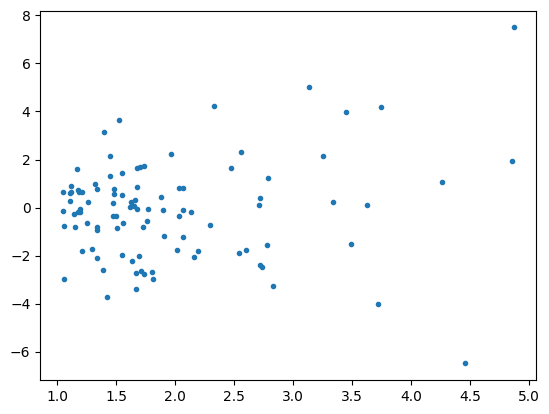

In [38]:
X=stats.expon(1).rvs(size=100)
Y=stats.norm(scale=X).rvs(size=100)
plt.plot(X,Y,".")

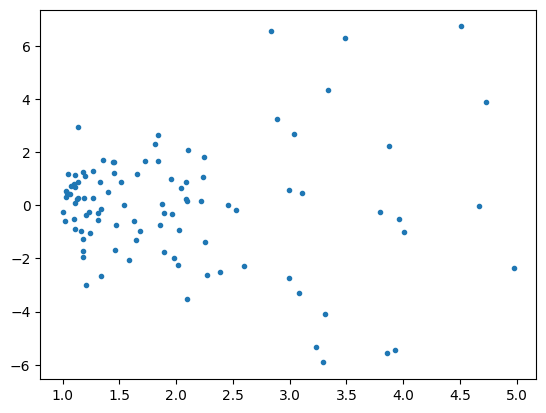

In [39]:
X=stats.expon(1).rvs(size=100)
Y=stats.norm().rvs(size=100)*X
plt.plot(X,Y,".")

In [27]:
def dataCreation_2():
    np.random.seed(10)

    """ on génère les pays: [0,1,2,3,4] <-> ["France","Allemagne","Espagne","Italie","Angleterre"]  """
    country = np.random.choice( a=[0,1,2,3,4] ,
                                p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                                size=1000)

    """on génère les boissons: [0,1,2] <-> ["coca","vin","biere"]"""
    favorite_beverage = np.empty_like(country)

    p = np.array([[0.3, 0.4, 0.3],# France
                  [0.3, 0.2, 0.5],# Allemagne
                  [0.4, 0.2, 0.4],# Espagne
                  [0.4, 0.2, 0.4],# Italie
                  [0.4, 0.2, 0.4]])# Angleterre
    for i in range(5):
        n_i = len(favorite_beverage[country == i])
        favorite_beverage[country == i] = np.random.choice(a=[0,1,2],p=p[i],size=n_i)

    """on colle pour faire une dataFrame"""
    dataFrame=np.stack([country,favorite_beverage],axis=1)

    return dataFrame

In [30]:
dataFrame=dataCreation_2()
dataFrame

array([[4, 1],
       [0, 1],
       [4, 2],
       ...,
       [1, 2],
       [4, 0],
       [1, 0]])

La p-value est très petite  <font color="red"> □ □ □ </font>

Allez jetez un oeil à la fonction de création des données, pour voir qu'on a volontairement rendu les donnéees non-indépendantes.

In [41]:
data="""
Gender FSIQ VIQ PIQ Weight Height MRI_Count
Female 133 132 124 118 64.5 816932
Male 140 150 124 ¥ 72.5 1001121
Male 139 123 150 143 73.3 1038437
Male 133 129 128 172 68.8 965353
Female 137 132 134 147 65.0 951545
Female 99 90 110 146 69.0 928799
Female 138 136 131 138 64.5 991305
Female 92 90 98 175 66.0 854258
Male 89 93 84 134 66.3 904858
Male 133 114 147 172 68.8 955466
Female 132 129 124 118 64.5 833868
Male 141 150 128 151 70.0 1079549
Male 135 129 124 155 69.0 924059
Female 140 120 147 155 70.5 856472
Female 96 100 90 146 66.0 878897
Female 83 71 96 135 68.0 865363
Female 132 132 120 127 68.5 852244
Male 100 96 102 178 73.5 945088
Female 101 112 84 136 66.3 808020
Male 80 77 86 180 70.0 889083
Male 83 83 86 ¥ ¥ 892420
Male 97 107 84 186 76.5 905940
Female 135 129 134 122 62.0 790619
Male 139 145 128 132 68.0 955003
Female 91 86 102 114 63.0 831772
Male 141 145 131 171 72.0 935494
Female 85 90 84 140 68.0 798612
Male 103 96 110 187 77.0 1062462
Female 77 83 72 106 63.0 793549
Female 130 126 124 159 66.5 866662
Female 133 126 132 127 62.5 857782
Male 144 145 137 191 67.0 949589
Male 103 96 110 192 75.5 997925
Male 90 96 86 181 69.0 879987
Female 83 90 81 143 66.5 834344
Female 133 129 128 153 66.5 948066
Male 140 150 124 144 70.5 949395
Female 88 86 94 139 64.5 893983
Male 81 90 74 148 74.0 930016
Male 89 91 89 179 75.5 935863
""";

In [45]:
dataList=data.split("\n")
data2=dataList[2:-1]
data2

['Female 133 132 124 118 64.5 816932',
 'Male 140 150 124 ¥ 72.5 1001121',
 'Male 139 123 150 143 73.3 1038437',
 'Male 133 129 128 172 68.8 965353',
 'Female 137 132 134 147 65.0 951545',
 'Female 99 90 110 146 69.0 928799',
 'Female 138 136 131 138 64.5 991305',
 'Female 92 90 98 175 66.0 854258',
 'Male 89 93 84 134 66.3 904858',
 'Male 133 114 147 172 68.8 955466',
 'Female 132 129 124 118 64.5 833868',
 'Male 141 150 128 151 70.0 1079549',
 'Male 135 129 124 155 69.0 924059',
 'Female 140 120 147 155 70.5 856472',
 'Female 96 100 90 146 66.0 878897',
 'Female 83 71 96 135 68.0 865363',
 'Female 132 132 120 127 68.5 852244',
 'Male 100 96 102 178 73.5 945088',
 'Female 101 112 84 136 66.3 808020',
 'Male 80 77 86 180 70.0 889083',
 'Male 83 83 86 ¥ ¥ 892420',
 'Male 97 107 84 186 76.5 905940',
 'Female 135 129 134 122 62.0 790619',
 'Male 139 145 128 132 68.0 955003',
 'Female 91 86 102 114 63.0 831772',
 'Male 141 145 131 171 72.0 935494',
 'Female 85 90 84 140 68.0 798612',
 'Mal

In [48]:
data3=[line.split(' ') for line in data2]
data3=np.array(data3)
data3

array([['Female', '133', '132', '124', '118', '64.5', '816932'],
       ['Male', '140', '150', '124', '¥', '72.5', '1001121'],
       ['Male', '139', '123', '150', '143', '73.3', '1038437'],
       ['Male', '133', '129', '128', '172', '68.8', '965353'],
       ['Female', '137', '132', '134', '147', '65.0', '951545'],
       ['Female', '99', '90', '110', '146', '69.0', '928799'],
       ['Female', '138', '136', '131', '138', '64.5', '991305'],
       ['Female', '92', '90', '98', '175', '66.0', '854258'],
       ['Male', '89', '93', '84', '134', '66.3', '904858'],
       ['Male', '133', '114', '147', '172', '68.8', '955466'],
       ['Female', '132', '129', '124', '118', '64.5', '833868'],
       ['Male', '141', '150', '128', '151', '70.0', '1079549'],
       ['Male', '135', '129', '124', '155', '69.0', '924059'],
       ['Female', '140', '120', '147', '155', '70.5', '856472'],
       ['Female', '96', '100', '90', '146', '66.0', '878897'],
       ['Female', '83', '71', '96', '135', '68.0

In [49]:
sex=data3[:,0]
qi=data3[:,1]

array(['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male'], dtype='<U7')

In [51]:
qi=qi.astype(int)
qi

array([133, 140, 139, 133, 137,  99, 138,  92,  89, 133, 132, 141, 135, 140,  96,  83, 132, 100, 101,  80,  83,  97, 135, 139,  91, 141,  85, 103,  77, 130, 133, 144, 103,  90,  83, 133, 140,  88,  81,  89])

In [61]:
qi_quand=qi//20
qi_quand=np.maximum(qi_quand-4,0)
qi_quand

array([2, 3, 2, 2, 2, 0, 2, 0, 0, 2, 2, 3, 2, 3, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 3, 0, 1, 0, 2, 2, 3, 1, 0, 0, 2, 3, 0, 0, 0])

In [53]:
sex[sex=='Female'] ='0'
sex[sex=='Male'] ='1'
sex

array(['0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1'], dtype='<U7')

In [54]:
sex=sex.astype(int)
sex

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [62]:
f_obs=computeFrequencies(sex,qi_quand,2,4)
f_obs

array([[9., 1., 9., 1.],
       [7., 3., 5., 5.]])

In [63]:
stats.chi2_contingency(f_obs)

Chi2ContingencyResult(statistic=5.059523809523809, pvalue=0.16749004783014632, dof=3, expected_freq=array([[8., 2., 7., 3.],
       [8., 2., 7., 3.]]))

In [ ]:
def debut_correction():
    """ '\n' c'est le symbole pour le retour à la ligne """
    dataList=data.split("\n")

    """on ignore les deux premières lignes et la dernière"""
    for i in range(2,len(dataList)-1):
        words=dataList[i].split(" ")
        #todo: mettre chaque word de words dans une matrice, en les convertissant comme il faut
        #todo: traiter les valeurs manquantes

## Test de Mann-Whitney





### Présentation

Nous présentons ici le test de Mann-Whitney (aussi appelé Wilcoxon à deux échantillons) qui permet de savoir si deux échantillons ont la même loi.

C'est un test non paramétrique: aucune hypothèse n'est faite sur les lois.

En pratique c'est un test très utilisé car il est très "robuste". En particulier
il n'est pas sensible aux valeurs aberrantes.
Ce sont les valeurs très grandes, très atypiques, provoquées par un individu atypique (ex : on a mis un rhinocéros dans la population d'éléphants)







 Ce test est notamment très utilisé en biologie/médecine/chimie. Peut-être serez-vous amenés à l'expliquer un jour à un non-mathématicien.


In [ ]:
"""les 2 échantillons à comparer"""
X1=np.random.exponential(scale=1,size=25)
X2=np.random.exponential(scale=1.6,size=30)
X1

In [ ]:
n1=len(X1)
n2=len(X2)
n1,n2

In [ ]:
fig,ax=plt.subplots(figsize=(12,2))
for x in X1:
    ax.plot([x,x],[0,1],"b")
for x in X2:
    ax.plot([x,x],[0,1],"r")

On observe l'alternances des observations. On voit que les traits bleus sont plus concentrés au début: sans doute les 2 échantillons n'ont pas la même loi. On va quantifier cela.

In [ ]:
"""on colle bout à bout les échantillons"""
Tout=np.concatenate([X1,X2],axis=0)

""" Les indexes qui permettrait de classer tout le monde """
indexSorted=np.argsort(Tout)

In [ ]:
alternance=np.zeros_like(indexSorted)
alternance[indexSorted<n1]=1
alternance[indexSorted>=n1]=2
alternance

In [ ]:
rang=np.arange(0,n1+n2)+1
rang

on calule la somme des rangs des éléments de chaque échantillon

In [ ]:
R1=np.sum(rang[alternance==1])
R2=np.sum(rang[alternance==2])

In [ ]:
R1

In [ ]:
R2

on calcule des écarts entre R1,R2 et une quantité qui correspond à leur espérance sous H0

In [ ]:
U1=n1*n2+n1*(n1+1)/2-R1
U2=n1*n2+n2*(n2+1)/2-R2  #c'est aussi égal à  n1*n2-U1
U=min(U1,U2)
""" on renormalise """
Z=(2*U+1-n1*n2 )/np.sqrt(n1*n2*(n1+n2+1)/3)
Z

La p-value se calcule à partir de la fonction de répartition gaussienne (tout est gaussien quand les données sont nombreuses).

Mais attention, si `n1 < 20` ou `n2 < 20`, il faut lire les valeurs critiques dans des tables ad hoc

In [ ]:
my_p_value=2*(1-stats.norm.cdf(np.abs(Z)))
my_p_value

maintenant avec la procédure toute faite

In [ ]:
D,p_value=stats.mannwhitneyu(X1,X2,alternative='two-sided')
p_value

***À vous:*** Refaite tourner le programme en partant de deux lois identiques.

### Ordre stochastique

La définition suivante va nous servir pour la suite:


> ***Définition:*** $\mu$ est stochastiquement plus grande que $\nu$ quand la fonction de queue de $\mu$ est plus grande que la fonction de queue de $\nu$:
$$
\forall x, \quad \mu\big(]x,\infty[\big)> \nu\big(]x,\infty[\big)
$$



Si l'on considère $(X_i)$ et $(Y_i)$ des échantillons de v.a de lois $\mu$ et $\nu$,  cela implique que l'histogramme des $(X_i)$ est plus décalé sur la droite que celui des $(Y_i)$. C'est donc bien une notion de "plus grand en moyenne".

#### ♡♡♡

***A vous:*** Considérons deux lois $\mu$ et $\nu$ tel que $\mu$ est stochastiquement plus grande que $\nu$. Montrez que l'on peut construire un couple de v.a. $(X,Y)$ avec $X$ suivant $\mu$ et $Y$ suivant $\nu$ tel que $X\geq Y$ presque surement.

Aide: pensez à nos techniques de simulations à partir de l'inversion de la fonction de répartition.






> ***Proposition:*** $\mu$ est stochastiquement plus grande que $\nu$ si et seulement si pour toute fonction décroissante $f$ on a
$$
\int f \mu \geq \int f \nu
$$

#### ♡♡

Démontrez cela en utilisant ce qu'on a vue précédemment.

#### Ordre convexe

Pour la culture, on dit que $\mu$ est plus grand que $\nu$ dans l'ordre convexe si pour toute fonction convexe $f$ on a:
$$
\int f \mu \geq \int f \nu
$$
C'est une définition qui est importante dans la théorie du transport. Cela signie que l'on peut obtenir l'une des distribution en "diffusant" l'autre.

###  H1 n'est pas le complémentaire de H0

Revenons au test de Mann-Whiney:
 ce test ne s'applique pas à n'importe quel couple de lois $\mu$ et $\nu$. Il présuppose qu'il y a un ordre stochastique entre ces deux lois. Il sépare donc les deux hypothèses suivantes:

* $H_0:$ les échantillons observés ont la même loi
* $H_1:$ la loi de l'un des deux échantillons est stochastiquement plus grande que la loi de l'autre échantillon.


En pratique, c'est très souvent le cas: quand on teste un médicament, il faut soit ne rien faire, soit être bénéfique, soit être toxique.

Mais observons deux échantillons "croisés" ainsi:

    o o o o o o x x x x x x x x x x x x o o o o o o

Clairement les `o` et les `x` n'ont pas même loi. On peut imaginer que
* la loi des `o` a une densité à deux bosses situées sur les côtés
* la loi des `x` a une densité à une bosse située au centre

Mais la somme des rangs `R1` et `R2` est la même. Ainsi Mann-Whitney concluera à l'égalité des lois (c'est un faux positif).
On voit donc bien que le test de Mann-Whitney n'est pas capable de différentier deux lois "quelconques".

Mathématiquement, si on se trompe et que l'on prend
* $H_0:$ les échantillons observés ont la même loi
* $H_1:$ les échantillons n'ont pas la même loi

Alors la puissance du test sera très très faible (beaucoup trop de faux positifs sont possibles).

Voici un exemple de deux lois qui ne sont pas stochastiquement ordonnées.

In [ ]:
x=np.linspace(-2,4,100)
queue1=1-stats.expon.cdf(x,scale=1)
queue2=1-stats.norm.cdf(x,loc=1)
fig,ax=plt.subplots()
ax.plot(x,queue1,label="queue1")
ax.plot(x,queue2,label="queue2")
ax.legend();

et un exemple de lois stochastiquement ordonnées.

***A vous:*** Laquelle est la plus grande?

In [ ]:
x=np.linspace(-2,4,100)
queue1=1-stats.expon.cdf(x,scale=1)
queue2=1-stats.expon.cdf(x,scale=1.6)
fig,ax=plt.subplots()
ax.plot(x,queue1,label="queue1")
ax.plot(x,queue2,label="queue2")
ax.legend();

## Deux autres tests d'indépendances

### Vote et sexe

Le sexe influe-t-il le vote? On dispose pour cela d'une liste de sexes (homme/femme) associée à une liste de votes (gauche/droite).


In [ ]:
data1 = "'femme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme'"
data2 = "'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite'"

In [ ]:
#on transforme les chaines de caractères en liste
sexesStr=data1.split(" ")
votesStr=data2.split(" ")
n=len(sexesStr)

#### ♡♡♡

In [ ]:
sexes=np.zeros(n)
votes=np.zeros(n)

for i in range(n):
    ...


In [ ]:
observed=computeFrequencies(sexes,votes,2,2)
observed

In [ ]:
stats.chi2_contingency(observed=observed)

Conclusion:


### QI et sexe $\triangleright$



Voici  de vraies données sous forme d'une chaine de caractères. Elles ont été prise [dans un article de recherche.](https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html)

Travail à effectuer :

*  retraitez ce jeu de données
*  testez si l'intelligence et le sexe sont indépendants.

Vous pouvez aussi imaginer de vérifier d'autres indépendances (ex: taille<->sexe).


Voici la signification des variables:

* IQ  = intelligence quotien = QI en français
* MRI = Magnetic Resonance Imaging  = IRM en français

* 1.Gender: Male or Female
* 2.FSIQ: Full Scale IQ scores
* 3.VIQ: Verbal IQ scores
* 4.PIQ: Performance IQ scores
* 5.Weight: body weight in pounds (hauteur du corps)
* 6.Height: height in inches (taille du corps)
* 7.MRI_Count: total pixel Count from the 18 MRI scans
* MRI_Count : représente la "taille" du cerveau évaluée par un décompte des  pixels sur l'IRM


Vous voulez en savoir plus sur VIQ et PIG [(référence).](http://provereal.blogspot.fr/2008/10/on-fsiq-viq-piq-general-discussion.html)

* Your VIQ score is indicative of your ability to work with abstract symbols,
your verbal memory skills and fluency abilities,
as well as the amount of education you have had, and whether you actually benefited from that education.

* Your PIQ score indicates your ability to work with concrete situations,
to work quickly, to integrate perceptual stimuli with motor responses,
as well as your visual spatial ability.


Nous allons effectuer un test sur le jeu de données suivant:

In [ ]:
data="""
Gender FSIQ VIQ PIQ Weight Height MRI_Count
Female 133 132 124 118 64.5 816932
Male 140 150 124 ¥ 72.5 1001121
Male 139 123 150 143 73.3 1038437
Male 133 129 128 172 68.8 965353
Female 137 132 134 147 65.0 951545
Female 99 90 110 146 69.0 928799
Female 138 136 131 138 64.5 991305
Female 92 90 98 175 66.0 854258
Male 89 93 84 134 66.3 904858
Male 133 114 147 172 68.8 955466
Female 132 129 124 118 64.5 833868
Male 141 150 128 151 70.0 1079549
Male 135 129 124 155 69.0 924059
Female 140 120 147 155 70.5 856472
Female 96 100 90 146 66.0 878897
Female 83 71 96 135 68.0 865363
Female 132 132 120 127 68.5 852244
Male 100 96 102 178 73.5 945088
Female 101 112 84 136 66.3 808020
Male 80 77 86 180 70.0 889083
Male 83 83 86 ¥ ¥ 892420
Male 97 107 84 186 76.5 905940
Female 135 129 134 122 62.0 790619
Male 139 145 128 132 68.0 955003
Female 91 86 102 114 63.0 831772
Male 141 145 131 171 72.0 935494
Female 85 90 84 140 68.0 798612
Male 103 96 110 187 77.0 1062462
Female 77 83 72 106 63.0 793549
Female 130 126 124 159 66.5 866662
Female 133 126 132 127 62.5 857782
Male 144 145 137 191 67.0 949589
Male 103 96 110 192 75.5 997925
Male 90 96 86 181 69.0 879987
Female 83 90 81 143 66.5 834344
Female 133 129 128 153 66.5 948066
Male 140 150 124 144 70.5 949395
Female 88 86 94 139 64.5 893983
Male 81 90 74 148 74.0 930016
Male 89 91 89 179 75.5 935863
""";

La première étape est de mettre les données dans un tableau `numpy` ou un dataframe `pandas`. Dans ce jeu de données, seules deux lignes ont des informations manquantes ; on peut donc les retirer complètement sans que cela soit particulièrement nuisible. Pour les calculs, on utilise un tableau `numpy` donc toutes les données doivent avoir le même type. Ici, on convertit tout en `float`, y compris le sexe (`Female -> 0.0` et `Male -> 1.0`).

In [ ]:
import pandas as pd
def pretraitement(data):

    lines = data.split("\n")
    n_lines = len(lines)-3

    tableau = []
    for i in range(n_lines):
        words = lines[2+i].split(" ")
        if '¥' not in words:
            tableau.append(words)

    array = np.array(tableau)
    array[array == 'Female'] = 0.0
    array[array == 'Male'] = 1.0
    array = np.array(array, dtype='float')

    return array

array = pretraitement(data)

df=pd.DataFrame(
    data=array,
    columns=["Gender", "FSIQ", "VIQ", "PIQ", "Weight", "Height", "MRI_Count"]
    )
df.head()

Ensuite il faut commencer par fixer les classes pour le QI. On tatonne un peu de manière à ce que chacune contienne au moins 5 personnes.

In [ ]:
bins = [75, 85, 95, 115, 135, 140, 150]
n_classes = len(bins)-1

hist = plt.hist(array[:,1], bins = bins, edgecolor='k');

print(("effectifs |" + " {:.0f} |"*n_classes).format(*hist[0]))

On peut maintenant calculer les effectifs associés à ces classes pour obtenir le tableau des effectifs croisés:

In [ ]:
sexe = array[:,0].copy()

IQ = array[:,1].copy()
for i,(left,right) in enumerate(zip(bins[:-1],bins[1:])):
    IQ[((IQ >= left)&(IQ<right))] = i

observed = computeFrequencies(sexe,IQ,2,n_classes)
df_observed = pd.DataFrame(
    data=observed,
    index=["Female", "Male"],
    columns=[str(left)+"-"+str(right)
             for left,right in zip(bins[:-1],bins[1:])],
    dtype=int)

df_observed

Il ne reste plus qu'à appliquer le test :

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed=observed)
print("p-value :", p)

La *p-value* de ce test est très grande, et donc l'hypothèse $H0$ est validée : le sexe et le QI sont indépendants.